# Fraud detection using Self Organizing Maps

In [ ]:
##Install MiniSom Package
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=15698e2de6e9788739debec3b02d68a7543fe0014a28c5b1a24d3e6da1c0da52
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
# Self Organizing Maps

# Importing Required Libraries
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing dataset
dataset = pd.read_csv('creditcard.csv')
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [ ]:
dataset.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [ ]:
print(dataset.shape)
print(dataset.describe())

(690, 16)
         CustomerID          A1  ...            A14       Class
count  6.900000e+02  690.000000  ...     690.000000  690.000000
mean   1.569047e+07    0.678261  ...    1018.385507    0.444928
std    7.150647e+04    0.467482  ...    5210.102598    0.497318
min    1.556571e+07    0.000000  ...       1.000000    0.000000
25%    1.563169e+07    0.000000  ...       1.000000    0.000000
50%    1.569016e+07    1.000000  ...       6.000000    0.000000
75%    1.575190e+07    1.000000  ...     396.500000    1.000000
max    1.581544e+07    1.000000  ...  100001.000000    1.000000

[8 rows x 16 columns]


In [ ]:
# X is all columns except last one class
# Y is Class - we use it to verify after clustering (SOM) is done 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [ ]:
# Training the SOM
#using MiniSom library
from minisom import MiniSom

In [ ]:
som = MiniSom(x=10,y=10,input_len=15)

In [ ]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [ ]:
som.distance_map().shape

(10, 10)

#visualisation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


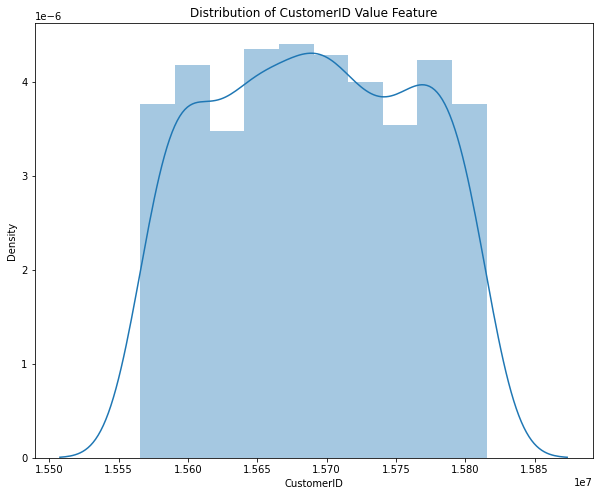

In [ ]:

plt.figure(figsize=(10,8))
plt.title('Distribution of CustomerID Value Feature')
sns.distplot(dataset.CustomerID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


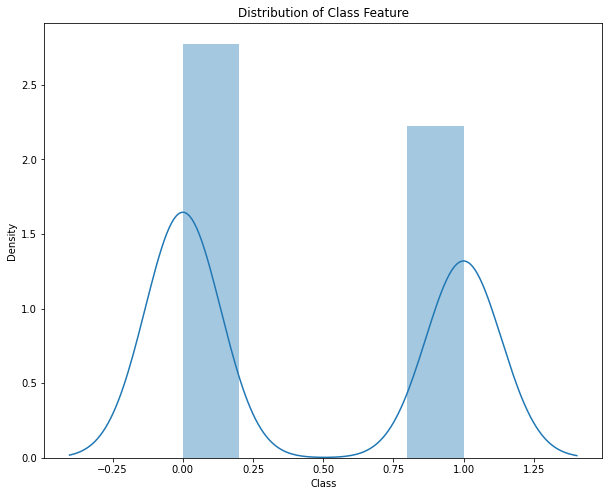

In [ ]:

#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Class Feature')
sns.distplot(dataset.Class)

In [ ]:
# visualizing the results 
from pylab import bone, colorbar, pcolor, plot, show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

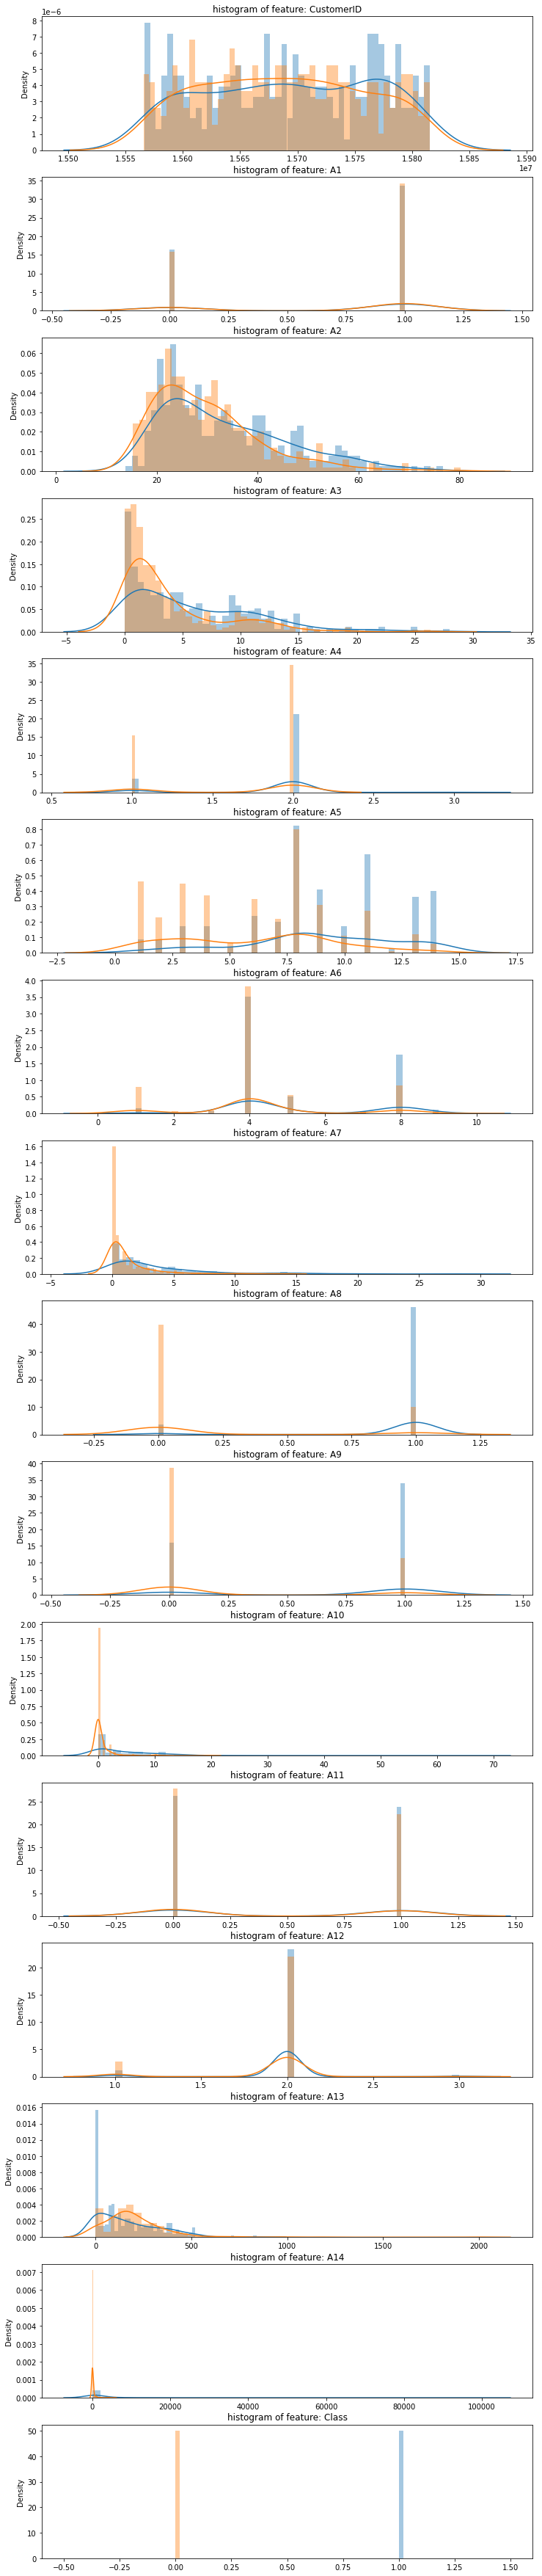

In [ ]:
# distribution of anomalous features
features = dataset.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(dataset[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(dataset[c][dataset.Class == 1], bins=50)
 sns.distplot(dataset[c][dataset.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

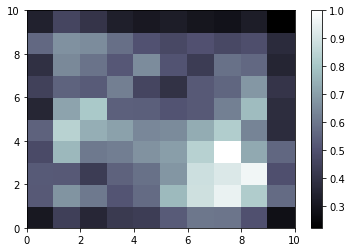

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()

The above shows the map , but we also need to find whether the customers in the winning neurons have been successful with their applications

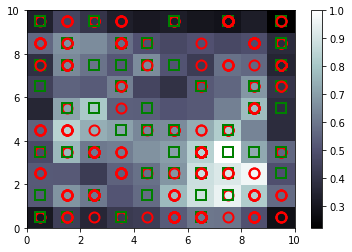

In [ ]:
# use markers o for class 0 in y 
# use square (s) for class 1 in y
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] #red circles -> customers who didn't get approval
colors = ['r', 'g'] # green square -> customers who got  approval
for i, x in enumerate(X):  # loop over customer database , for each customer vector
    w = som.winner(x)  # getting the winning node for the particular customer
    plot(w[0] + 0.5, # x coordinate of winning node = w[0]
         w[1] + 0.5, # y coordinate of the winning node = w[1], adding 0.5 to put marker in middle of square
         markers[y[i]],# association between customer approval and markers
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

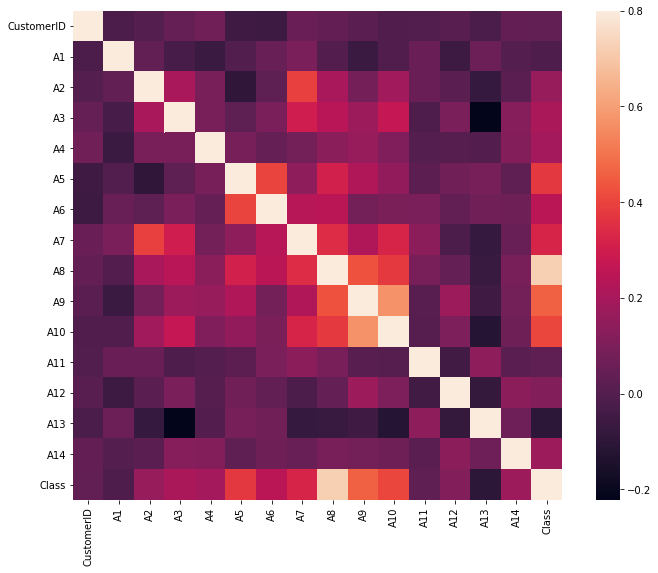

In [ ]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

We find winning outlier neurons which have green squares to identify potential frauds

In [ ]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(6, 2), (2, 3), (6, 0), (3, 6), (4, 2), (1, 3), (1, 9), (8, 8), (4, 5), (5, 9), (4, 4), (2, 1), (7, 9), (0, 6), (5, 2), (6, 3), (9, 8), (2, 9), (6, 6), (9, 6), (8, 6), (8, 0), (0, 8), (1, 7), (9, 5), (3, 8), (1, 5), (3, 2), (9, 7), (9, 3), (5, 0), (7, 7), (3, 4), (4, 8), (1, 4), (7, 4), (5, 3), (7, 2), (0, 9), (0, 0), (5, 1), (0, 3), (1, 1), (8, 5), (4, 7), (0, 4), (8, 1), (1, 8), (2, 7), (2, 0), (4, 0), (7, 1), (3, 3), (0, 7), (9, 9), (9, 0), (2, 5), (0, 1), (5, 4), (6, 8), (1, 0), (8, 7), (7, 3), (3, 9), (7, 0), (3, 5), (5, 7), (0, 2), (6, 4), (9, 1), (8, 2), (2, 4), (4, 1), (6, 7), (3, 7), (9, 2), (6, 1), (3, 0), (8, 3)])

In [ ]:
# from fig squares (7,5) seem like potential fraudulent customers - white color - maximum mean interneuron distance
frauds = np.concatenate((mappings[(6,4)],mappings[(6,8)]),axis=0)
#frauds = mappings[(7,5)]
np.asarray(frauds).shape

(3, 15)

The above values are scaled down values . Hence we use inverse transform to get actual customer records

In [ ]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

(3, 15)

The above list shows customers who the bank needs to investigate 

## Printing the Fraudulent Clients


In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15726167
15700549
15570990
